<a href="https://colab.research.google.com/github/KathyRoma/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# I start with importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [0]:
# I download the dataset using shell command
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-05-12 21:35:52--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.2’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2020-05-12 21:35:52 (614 KB/s) - ‘house-votes-84.data.2’ saved [18171/18171]



In [0]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data')
df.head()

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [0]:
# I use the description from the source to define appropriate column names and then create a header

column_headers = ['party', 'handicapped-infants', 'water-project', 
                  'budget', 'physician-fee-freeze', 'el-salvador-aid', 
                  'religious-groups', 'anti-satellite-ban', 'aid-to-contras', 
                  'mx-missile', 'immigration', 'synfuels', 'education', 'right-to-sue', 'crime', 'duty-free', 'south-africa']

df= pd.read_csv('house-votes-84.data', names = column_headers)

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
# I perform some categorical encoding to replace string values 'y' and 'n' with numeric equivalents, and replace '?' with a Nan
# And I also want to remove NaNs for further convenience
df = df.replace({'y' : 1, 'n' : 0, '?' : np.NaN}).dropna()
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
19,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
23,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
25,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [0]:
# I create two dataframes based on party
dem = df[df['party'] == 'democrat']
rep = df[df['party'] == 'republican']

In [0]:
dem.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
19,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
23,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
25,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
26,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [0]:
# I don't need a party column, it is reflected in the dataframe name
dem = dem.drop(['party'], axis=1)
dem.head()

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
5,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
19,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
23,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
25,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
26,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [0]:
dem = dem.astype(int)
dem.head()


,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
5,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
19,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
23,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
25,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1
26,1,0,1,0,0,0,1,1,1,0,1,0,0,0,1,1


In [0]:
# Lookng at the column mean
dem['budget'].mean()

0.8548387096774194

In [0]:
# I convert a column to an array
## Still hate those decimals but will deal with them later
dem_budget_votes = dem['budget'].to_numpy()
dem_budget_votes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [0]:
# Calculating confidence
confidence_level = .95
confidence = (1 + confidence_level) / 2
confidence

0.975

In [0]:
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  x_bar = np.mean(data)
  n = len(data)
  s = np.std(data, ddof=1)
  std_err = s / np.sqrt(n)
  t = stats.t.ppf((1 + confidence) / 2, n - 1)
  margin_of_error = t*std_err
  lower_bound = x_bar - margin_of_error
  upper_bound = x_bar + margin_of_error
  return (lower_bound, x_bar, upper_bound)

In [0]:
# I apply our function to the sample
confidence_interval(dem_budget_votes)

(0.791966749899413, 0.8548387096774194, 0.9177106694554258)

Graphical representation the confidence intervals



In [0]:
# I create a new dataframe to plot a graph
df = pd.DataFrame({'dem_budget_votes': dem_budget_votes})
df.head()

,dem_budget_votes
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


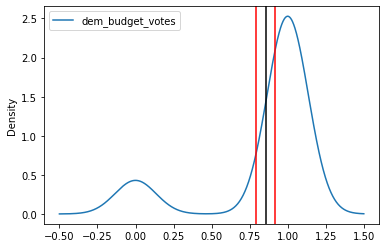

In [0]:
lower, mean, upper = confidence_interval(dem_budget_votes)

df.plot.density()
plt.axvline(x=lower, color='red')
plt.axvline(x=mean, color='black')
plt.axvline(x=upper, color='red')
plt.show()

In [0]:
# I want to reiterate our function for every column I have
confidence_intervals = []

for col in dem.columns:
  confidence_intervals.append(confidence_interval(dem[col]))

confidence_intervals

[(0.5008854514528094, 0.5887096774193549, 0.6765339033859004),
 (0.3627917755681809, 0.45161290322580644, 0.540434030883432),
 (0.791966749899413, 0.8548387096774194, 0.9177106694554258),
 (0.01008836071171925, 0.04838709677419355, 0.08668583283666784),
 (0.13000591391201893, 0.20161290322580644, 0.27321989253959394),
 (0.3548790007497182, 0.4435483870967742, 0.5322177734438303),
 (0.6905800506734978, 0.7661290322580645, 0.8416780138426312),
 (0.7637035637475735, 0.8306451612903226, 0.8975867588330717),
 (0.7176672431336555, 0.7903225806451613, 0.862977918156667),
 (0.44320399355877216, 0.532258064516129, 0.6213121354734858),
 (0.41883613678222775, 0.5080645161290323, 0.5972928954758367),
 (0.06919940918552969, 0.12903225806451613, 0.18886510694350256),
 (0.2093085202865504, 0.2903225806451613, 0.3713366410037722),
 (0.26182787733541646, 0.3467741935483871, 0.4317205097613578),
 (0.5092216687100866, 0.5967741935483871, 0.6843267183866877),
 (0.9023566825660085, 0.9435483870967742, 0.98

In [0]:
# a service dataframe for visualisations
CI = pd.DataFrame(confidence_intervals)
CI.columns = ['lower', 'mean', 'upper']
CI['moe']  = CI['upper'] - CI['mean']
 
CI.head(10)

,lower,mean,upper,moe
0,0.500885,0.588710,0.676534,0.087824
1,0.362792,0.451613,0.540434,0.088821
2,0.791967,0.854839,0.917711,0.062872
3,0.010088,0.048387,0.086686,0.038299
4,0.130006,0.201613,0.273220,0.071607
5,0.354879,0.443548,0.532218,0.088669
6,0.690580,0.766129,0.841678,0.075549
7,0.763704,0.830645,0.897587,0.066942
8,0.717667,0.790323,0.862978,0.072655
9,0.443204,0.532258,0.621312,0.089054


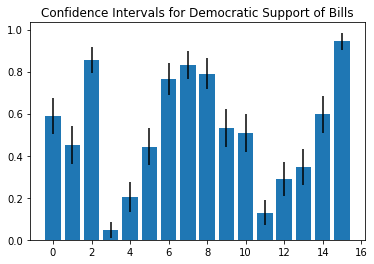

In [0]:
plt.bar(x=range(0,16,1), height=CI['mean'], yerr=CI['moe'])
plt.title("Confidence Intervals for Democratic Support of Bills")
plt.show()

### Chi-squared tests:


In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [0]:
df.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [0]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [0]:
observed = pd.crosstab(df['sex'], df['occupation'])

observed

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
sex,,,,,,,,,,,,,,
Female,2537,0,222,1159,65,164,550,1800,141,1515,76,1263,348,90
Male,1233,9,3877,2907,929,1206,1452,1495,8,2625,573,2387,580,1507


In [0]:
observed_margins = pd.crosstab(df['sex'], df['occupation'], margins=True)

observed_margins

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,All
sex,,,,,,,,,,,,,,,
Female,2537,0,222,1159,65,164,550,1800,141,1515,76,1263,348,90,9930
Male,1233,9,3877,2907,929,1206,1452,1495,8,2625,573,2387,580,1507,20788
All,3770,9,4099,4066,994,1370,2002,3295,149,4140,649,3650,928,1597,30718


In [0]:
observed_margins.shape

(3, 15)

In [0]:
# grab the row sums from the crosstab
row_sums = observed_margins.iloc[:2, -1].values
row_sums


array([ 9930, 20788])

In [0]:
# grab the column sums from the crosstab
col_sums = observed_margins.iloc[2:, 0:14].values
col_sums = col_sums[0]

col_sums

array([3770,    9, 4099, 4066,  994, 1370, 2002, 3295,  149, 4140,  649,
       3650,  928, 1597])

In [0]:
total_total = df.shape[0]

total_total

32561

In [0]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total_total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)  
print(expected)

(1, 14)
[[1149.72206013    2.74469457 1250.05589509 1239.99201499  303.13626731
   417.80350726  610.54205952 1004.86317988   45.43994349 1262.5595037
   197.92297534 1113.12613249  283.00850711  487.03080372]]


In [0]:
chi2 = ((observed - expected)**2 / expected).sum().sum()

chi2

5792.87914253501

Using Scipy

In [0]:
# p-value is extremally small, it mean there's a dependancy 
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

print(" chi2 statistic", chi2)
print("\n p-value", p_value)
print("\n degrees of freedom",dof)
print("\n expected frequencies table: \n", expected)

 chi2 statistic 5792.879142535008

 p-value 0.0

 degrees of freedom 13

 expected frequencies table: 
 [[1218.70238948    2.9093691  1325.05599323 1314.38830653  321.32365388
   442.8706296   647.17299303 1065.15235367   48.16622176 1338.30978579
   209.7978384  1179.91080148  299.98828049  516.25138355]
 [2551.29761052    6.0906309  2773.94400677 2751.61169347  672.67634612
   927.1293704  1354.82700697 2229.84764633  100.83377824 2801.69021421
   439.2021616  2470.08919852  628.01171951 1080.74861645]]


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)